In [1]:
# Das sind zusätzliche libraries die ich für die mathematischen Operationen
# und zum Plotten benutze. In Matlab gibt es definitv was Ähnliches
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

In [2]:
# Auslesen der CSV files
data_cam1 = pd.read_csv("Kinect_1807_1_weit_test2_HU.csv")
data_cam2 = pd.read_csv("Kinect_1807_2_weit_test2_HU.csv")

In [3]:
# hier lasse ich mir die ersten Zeilen zur Kontrolle anzeigen
data_cam1.head()

,Location,x,y,z
0,AnkleLeft.X,-0.166953,-0.652160,2.957230
1,AnkleRight.X,0.105894,-0.670519,3.035919
2,ElbowLeft.X,-0.304382,0.407180,2.942685
3,ElbowRight.X,0.238033,0.375192,3.071859
4,FootLeft.X,-0.169871,-0.749607,2.869495


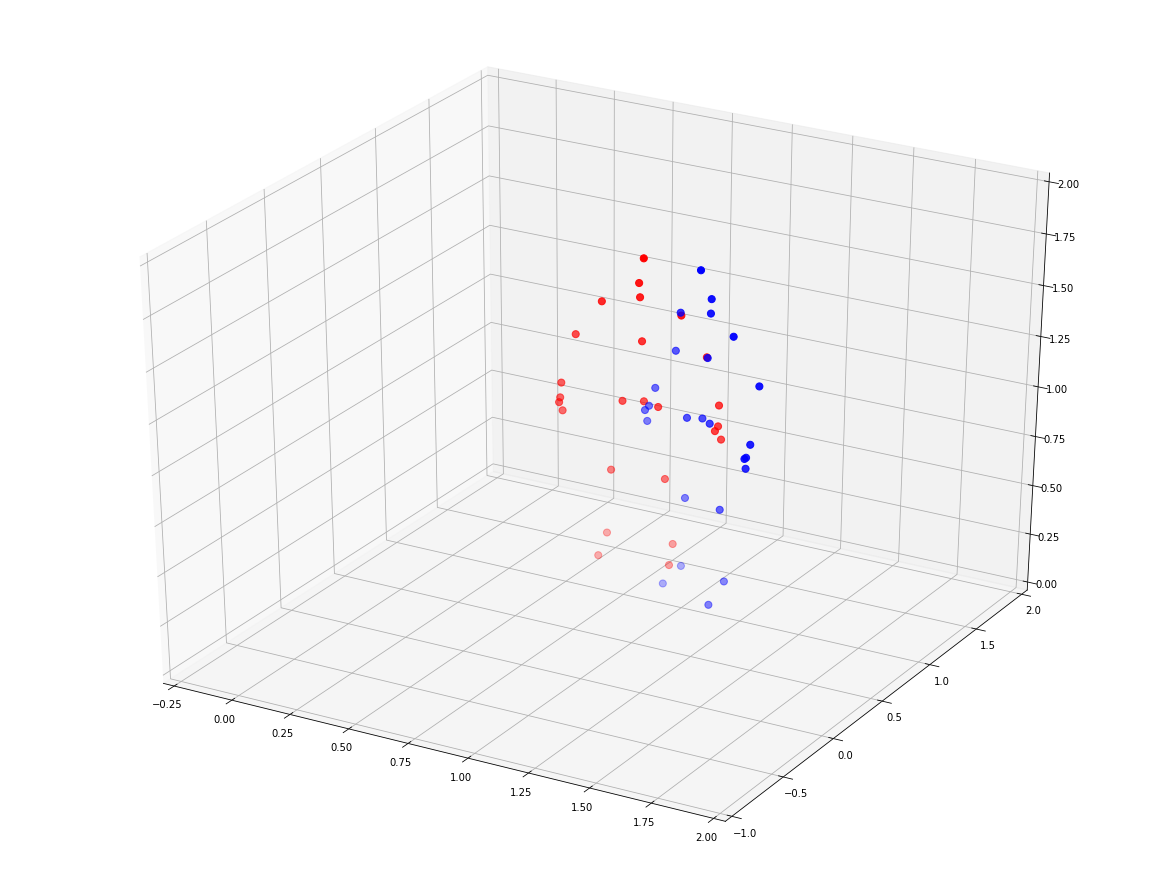

In [4]:
# Plotten der Daten 
fig = plt.figure(figsize=(16,12))
ax = Axes3D(fig)
ax.axes.set_zlim3d(0, 2)
ax.axes.set_xlim3d(-0.25, 2)
ax.axes.set_ylim3d(-1, 2)
ax.scatter3D(xs=data_cam1.x,ys=data_cam1.z,zs=data_cam1.y, c='red', s=50)
ax.scatter3D(xs=data_cam2.x,ys=data_cam2.z,zs=data_cam2.y, c='blue', s=50)

In [5]:
# Ich extrahiere die x, y, z Koordinaten aus der Tabelle und speichere sie als Matrix,
# Source Points sind von der Hauptkamera, destination points von der Anderen
# hier tausche ich auch y und z Koordinate wegen deinem komischen Sytem
source_points = data_cam1.as_matrix(('x','z','y'))
dst_points = data_cam2.as_matrix(('x','z','y'))

# Ich füge eine zusätzliche Spalte mit Einsen ans Ende der beiden Matrizen 
aux = np.ones((25, 1))
source_points = np.hstack((source_points, aux))
dst_points = np.hstack((dst_points, aux))

In [6]:
# Lösen des Gleichungsystems, hier brauchst du eine äquivalente Funktion aus Matlab
transform_mat, res, rank, s = np.linalg.lstsq(dst_points, source_points, rcond=None)

In [7]:
# eine kleine Änderung des Datentyps, brauche ich aber nur hier in meinem speziellen Fall
transform_mat = np.array(transform_mat)
# Ausgabe der Transformationsmatrix, unten rechts muss eien 1 stehen!
print(transform_mat)

[[ 8.09122676e-01  6.54378874e-01  3.78859124e-02 -8.36721483e-16]
 [-4.95206017e-01  6.76962758e-01  1.67655368e-01 -2.83249757e-16]
 [ 7.66805286e-02 -6.51322905e-02  9.52042141e-01  2.32288175e-16]
 [ 1.23158522e+00  7.74757773e-01 -4.53695490e-01  1.00000000e+00]]


In [8]:
# Umkehrrechnung zur Kontrolle, also Punkte der 2en Kamera mal Transformationsmatrix (dot prduct)
results = dst_points.dot(transform_mat)

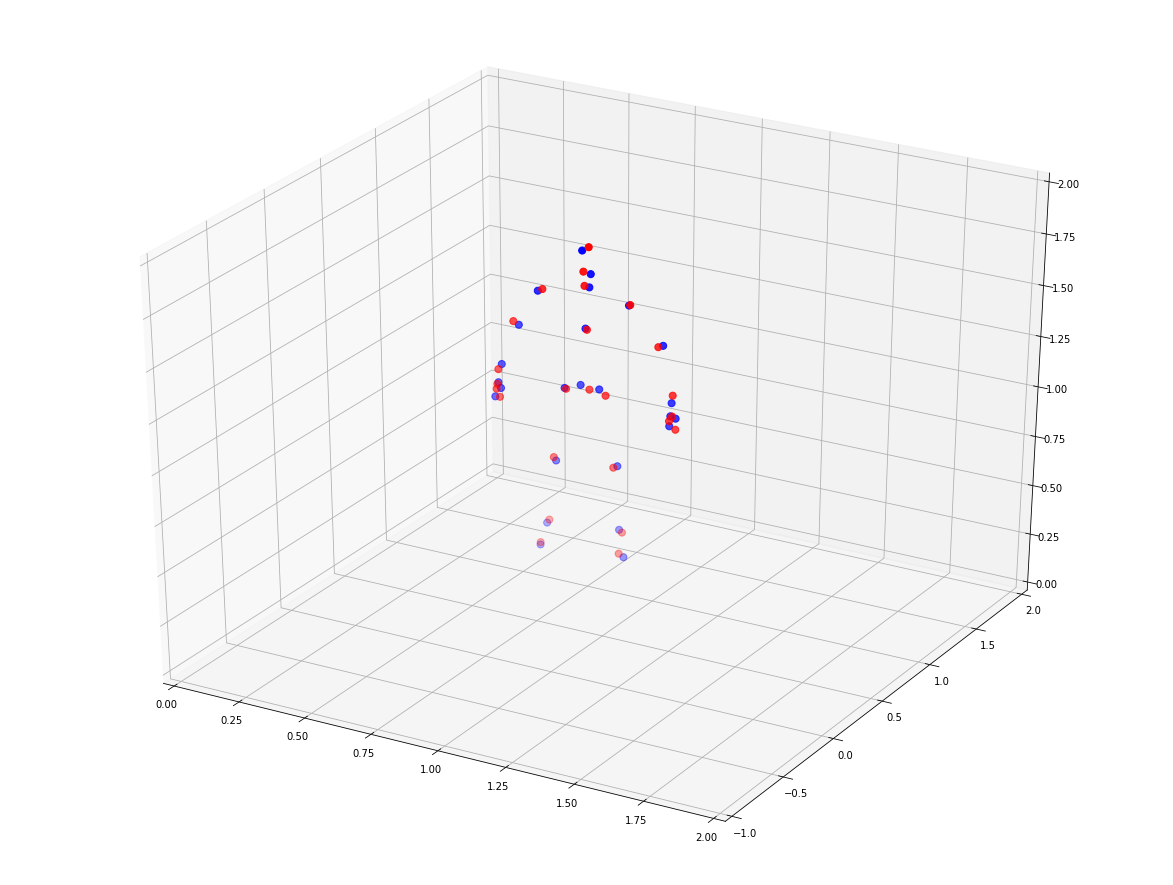

In [9]:
# Ergebnisse plotten zur Kontrolle
fig = plt.figure(figsize=(16,12))
ax = Axes3D(fig)
ax.axes.set_zlim3d(0, 2)
ax.axes.set_xlim3d(0, 2)
ax.axes.set_ylim3d(-1, 2)
ax.scatter3D(xs=data_cam1.x,ys=data_cam1.z,zs=data_cam1.y, c='red', s=50)
ax.scatter3D(xs=results[:,0],ys=results[:,1],zs=results[:,2], c='blue', s=50)

(-1, 1.2)

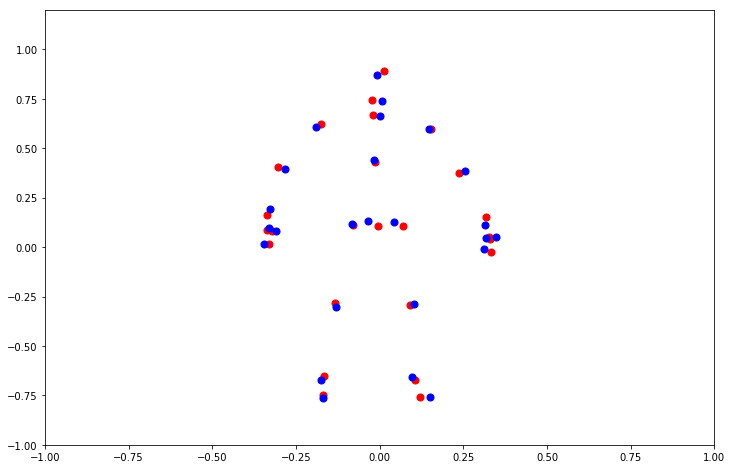

In [10]:
# Ergebnisse plotten zur Kontrolle
fig = plt.figure(figsize=(12,8))
plt.scatter(x=data_cam1.x,y=data_cam1.y, c='red', s=50)
plt.scatter(x=results[:,0],y=results[:,2], c='blue', s=50)
plt.xlim(-1,1)
plt.ylim(-1,1.2)

In [11]:
# Ausgabe des Fehlers: Laut Funktion sind das die Summen der Residuen für jeden Spalte der Matrix
# Bin mir leider nicht ganz sicher wie das zu interpretieren ist
res

array([7.17875718e-03, 3.07006566e-03, 6.07860331e-03, 1.55089209e-31])

In [12]:
# Neue Daten zum Test für den gehobenen Arm
newdata_cam2 = pd.read_csv("Kinect_1807_2_weit_test2_HO.csv")
newdata_cam1 = pd.read_csv("Kinect_1807_1_weit_test2_HO.csv")

# Gleiches Spiel wie oben: extrahieren als Matrix und 1 adden
new_points2 = newdata_cam2.as_matrix(('x','z','y'))
new_points1 = newdata_cam1.as_matrix(('x','z','y'))
aux = np.ones((25, 1))
new_points2 = np.hstack((new_points2, aux))
new_points1 = np.hstack((new_points1, aux))

In [13]:
# Anwendung der transformationsmatrix auf die neuen Punkte von Kamera 2
results_new = new_points2.dot(transform_mat)

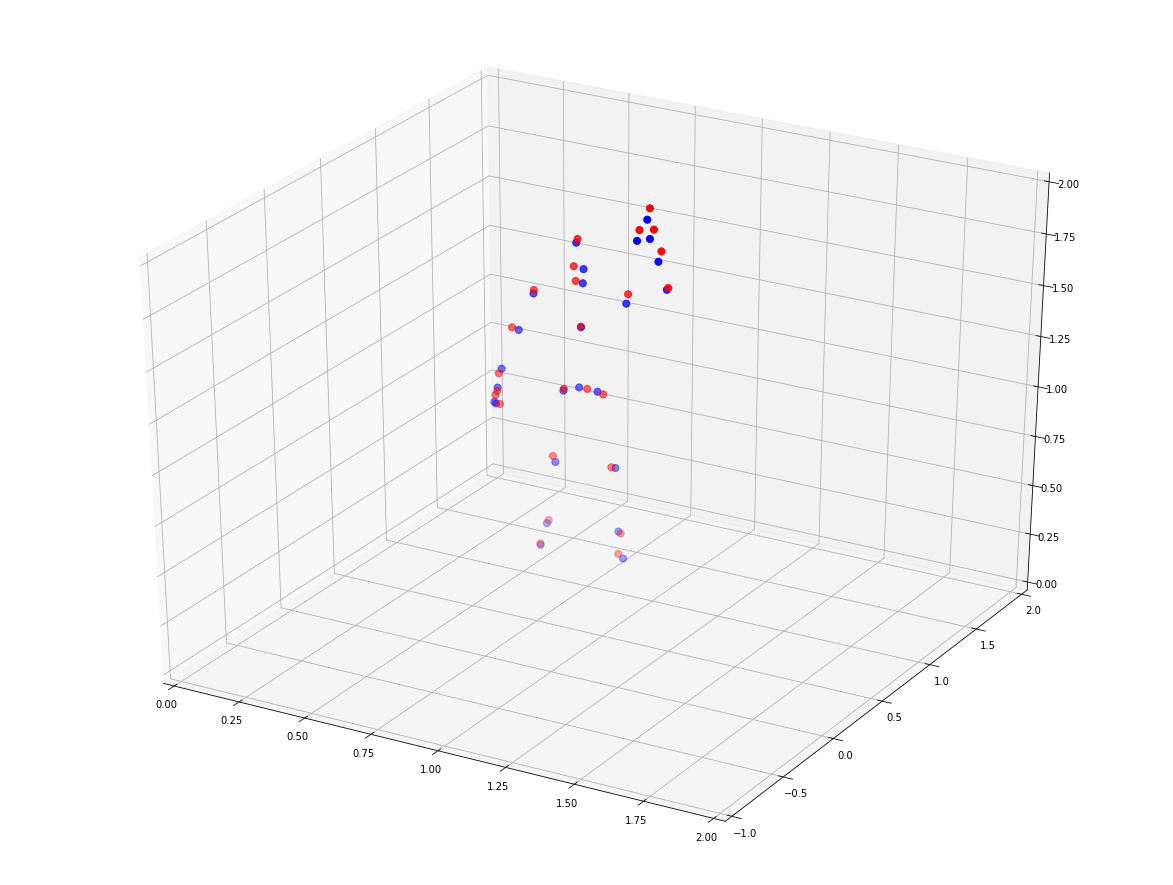

In [14]:
# Plotten des Results gegen die Punkte von Kamera 1
fig = plt.figure(figsize=(16,12))
ax = Axes3D(fig)
ax.axes.set_zlim3d(0, 2)
ax.axes.set_xlim3d(0, 2)
ax.axes.set_ylim3d(-1, 2)
ax.scatter3D(xs=newdata_cam1.x,ys=newdata_cam1.z,zs=newdata_cam1.y, c='red', s=50)
ax.scatter3D(xs=results_new[:,0],ys=results_new[:,1],zs=results_new[:,2], c='blue', s=50)

(-1, 1.2)

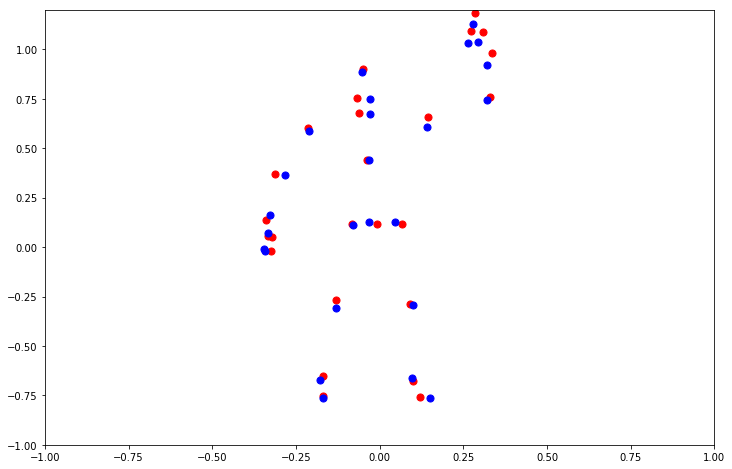

In [15]:
# 2d
fig = plt.figure(figsize=(12,8))
plt.scatter(x=newdata_cam1.x,y=newdata_cam1.y, c='red', s=50)
plt.scatter(x=results_new[:,0],y=results_new[:,2], c='blue', s=50)
plt.xlim(-1,1)
plt.ylim(-1,1.2)